# Audio Fingerprinting

## Audio Load & Analysis

In [1]:
import os
from dotenv import load_dotenv
from kishikan import Kishikan

In [2]:
load_dotenv()
k = Kishikan(os.getenv('MONGO_URI'))
k.fingerprint('songs', is_dir=True)

{'5df5db10f495089c5caa5a833a467334', '8d18521c44de206b514772caad2992d0', 'd3ab571d72b4ebcc306ef440df9ad1e0'}
Skipped duplicated fingerprinting for songs/1.wav...
Skipped duplicated fingerprinting for songs/2.mp3...
Skipped duplicated fingerprinting for songs/1.mp3...


Detected peaks (9607, 2)


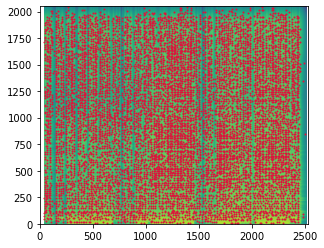

Num fingerprints 134393


In [3]:
import librosa
from kishikan.core import fingerprint

y, sr = librosa.load('songs/1.wav', mono=True, sr=22050)
fp = fingerprint(y, sr=sr)
print(f"Num fingerprints {len(fp)}")

## Audio Recognition from Input